# Pymaceuticals Inc.
---

### Analysis
In this research we examine the performance of Capomulin against other treatment regimens for tumors in mice. The study spanned 45 days and was tested on 249 mice with SCC tumors. 
From this analysis we learned that tumor size reduced in select mice over the 45 day period using Capomulin. We also learned that there is a strong positive corelation between the weight of the mouse and the size of the tumor. It should be noted that since the corelation is so strong, weight should be monitored for future studies. 
Additionally, it was noted that the treatment Ramicane resulted in tumor sizes about as low as Capomulin when compatring them to Infubinol and Ceftamin which both showed much higher tumor sizes for their treatment regimens. 

In [186]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [187]:
# Checking the number of mice.
total_mice = len(mouse_study_complete['Mouse ID'].unique())
total_mice                 

249

In [188]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_complete.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name='count')
duplicate_mice = duplicate_mice[duplicate_mice['count'] > 1]

# Extract the unique Mouse IDs and convert to a pandas Series
result_series = duplicate_mice['Mouse ID'].astype(str).unique()

# Convert the Series to the desired string format
result_string = "array({}, dtype=object)".format(result_series)

result_string

"array(['g989'], dtype=object)"

In [189]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = mouse_study_complete[mouse_study_complete['Mouse ID'].isin(duplicate_mice['Mouse ID'])]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [190]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_study_complete.copy()
mask = clean_mouse_df['Mouse ID'] == 'g989'
clean_mouse_df = clean_mouse_df[~mask]
clean_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [191]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(clean_mouse_df['Mouse ID'].unique())
total_mice   

248

## Summary Statistics

In [192]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen = clean_mouse_df.groupby('Drug Regimen')

mean = regimen['Tumor Volume (mm3)'].mean()
median = regimen['Tumor Volume (mm3)'].median()
variance = regimen['Tumor Volume (mm3)'].var()
std_deviation = regimen['Tumor Volume (mm3)'].std()
sem = regimen['Tumor Volume (mm3)'].sem()

summary_statistics_df = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std_deviation,
    "Tumor Volume Std. Err.": sem})

summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [193]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
new_summary_statistics_df = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
new_summary_statistics_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Rows'>

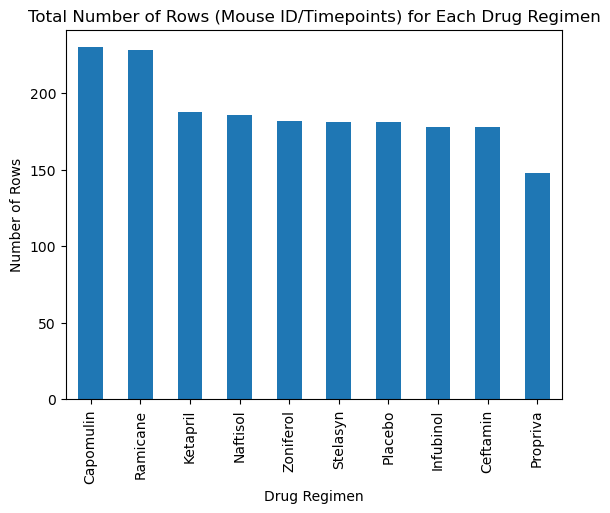

In [194]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_mouse_df['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', xlabel='Drug Regimen', ylabel='Number of Rows', title='Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')

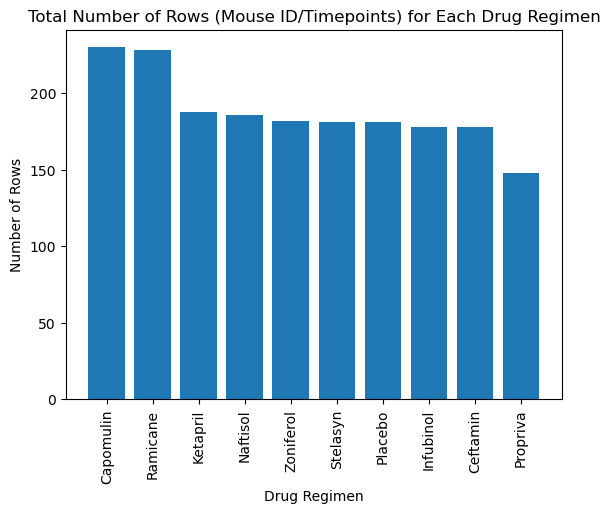

In [195]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_mouse_df['Drug Regimen'].value_counts()
values = regimen_counts.values
labels = regimen_counts.index
plt.bar(labels, values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=90)
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.show()

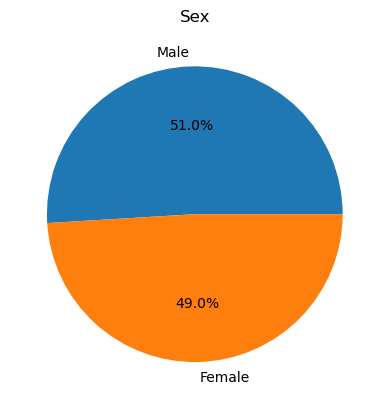

In [196]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_counts = clean_mouse_df['Sex'].value_counts()
genders = gender_counts.index
counts = gender_counts.values
plt.pie(counts, labels=genders, autopct='%1.1f%%',)
plt.title('Sex')
plt.show()

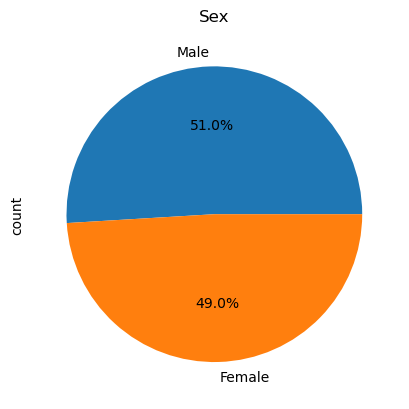

In [197]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = clean_mouse_df['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [198]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mouse_df.groupby('Mouse ID')['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume = pd.merge(last_timepoint, mouse_study_complete, on=['Mouse ID', 'Timepoint'], how='inner')
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume = tumor_volume[tumor_volume['Drug Regimen'].isin(regimens)]

In [199]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
grouped = tumor_volume.groupby('Drug Regimen')

# Create empty list to fill with tumor vol data (for plotting)
vol_data = {}

# Iterate over each treatment
for treatment in treatments:
    # Get the group corresponding to this treatment
    group_data = grouped.get_group(treatment)
    
    # Calculate quartiles and IQR
    quartiles = group_data['Tumor Volume (mm3)'].quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine upper and lower bounds for outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Find outliers
    outliers = group_data[(group_data['Tumor Volume (mm3)'] < lower_bound) | (group_data['Tumor Volume (mm3)'] > upper_bound)]

    # Store tumor volumes in the dictionary
    vol_data[treatment] = (group_data['Tumor Volume (mm3)'], outliers)

# Print tumor volumes with outliers
for treatment, (data, outliers) in vol_data.items():
    if not outliers.empty:
        print(f"Treatment: {treatment}")
        print("Series with potential outliers:")
        print(data)
        print("Outliers:")
        print(outliers)
    
    # add subset 

    
    # Determine outliers using upper and lower bounds



Treatment: Infubinol
Series with potential outliers:
0      67.973419
1      65.525743
11     57.031862
13     66.083066
27     72.226731
31     36.321346
41     60.969711
50     62.435404
56     60.918767
78     67.289621
97     66.196912
101    62.117279
123    47.010364
129    60.165180
141    55.629428
142    45.699331
153    54.656549
170    55.650681
197    46.250112
200    54.048608
202    51.542431
211    50.005138
216    58.268442
233    67.685569
245    62.754451
Name: Tumor Volume (mm3), dtype: float64
Outliers:
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
31     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
31  Female          18          25  


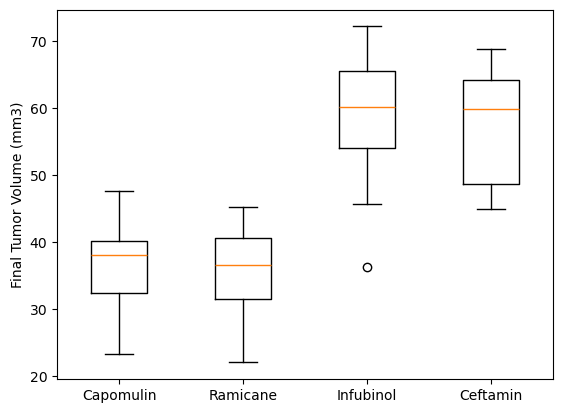

In [213]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volumes for each treatment
tumor_volume_data = []

# Group the DataFrame by the 'Drug Regimen' column
grouped = tumor_volume.groupby('Drug Regimen')

# Iterate over each treatment
for treatment in treatments:
    # Get the tumor volumes for this treatment
    tumor_volumes = grouped.get_group(treatment)['Tumor Volume (mm3)']
    
    # Append the tumor volumes to the list
    tumor_volume_data.append(tumor_volumes)
    
# Create a box plot
plt.boxplot(tumor_volume_data, labels=treatments)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

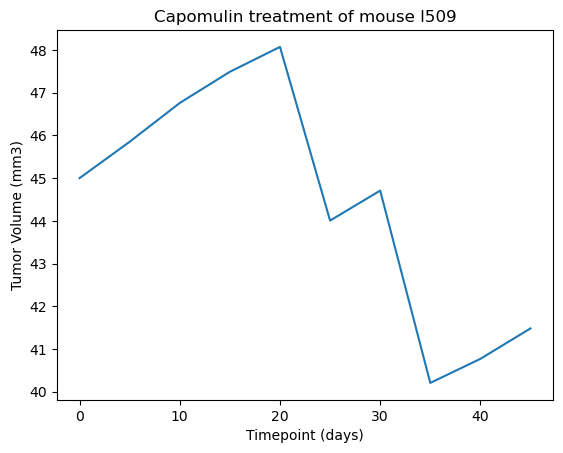

In [201]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_mouse_df[clean_mouse_df['Drug Regimen'] == 'Capomulin']

# Assuming you want to plot for a single mouse (change 'mouse_id' to the actual ID of the mouse you want to plot)
mouse_id = 'l509'
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Create the line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse ' + mouse_id )
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

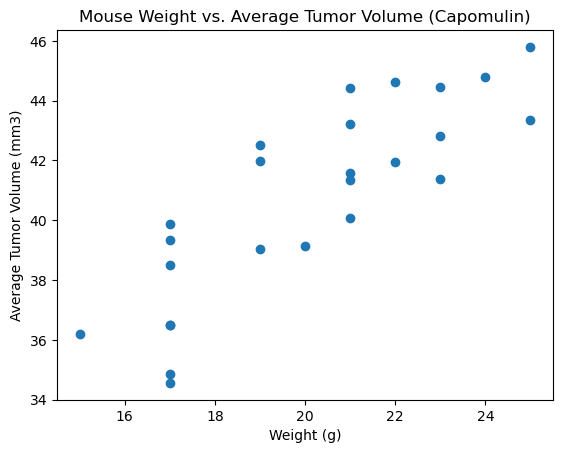

In [202]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

merged_data = pd.merge(capomulin_data[['Mouse ID', 'Weight (g)']], average_tumor_volume, on='Mouse ID')
merged_data = merged_data.drop_duplicates()

plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

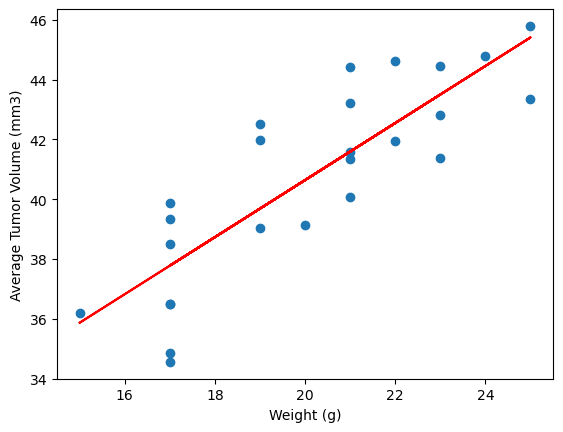

In [207]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

weight = merged_data['Weight (g)']
average_tumor_volume = merged_data['Tumor Volume (mm3)']

d_slope, d_int, d_r, d_p, d_std_err = linregress(weight, average_tumor_volume)
d_fit = d_slope * weight + d_int

plt.scatter(weight, average_tumor_volume)
plt.plot(weight, d_fit, "-", color='red', label='Fitted line')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()